<a href="https://colab.research.google.com/github/StalinSagolsem/testing/blob/main/testing_conf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import librosa


In [ ]:
# Load the saved model
model = load_model('MyBestModel.h5')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
def features_extractor(file):
    try:
        audio, sample_rate = librosa.load(file)
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error processing {file}: {e}")
        return None

In [ ]:
from tqdm import tqdm
import os
import pandas as pd

In [ ]:
extracted_features = []

root_dir = "C:\\Users\\sagol\\Desktop\\6_class_UrbanSound"
testing_folder = os.path.join(root_dir, "testing")

In [ ]:
print(f"testing_folder: {testing_folder}")

if not os.path.exists(testing_folder):
    raise FileNotFoundError(f"The directory {testing_folder} does not exist")

testing_folder: C:\Users\sagol\Desktop\6_class_UrbanSound\testing


In [ ]:
# Iterate over each class folder in testing_folder
for class_folder in os.listdir(testing_folder):
    class_folder_path = os.path.join(testing_folder, class_folder)
    if not os.path.isdir(class_folder_path):
        continue

    # Iterate over each file in the class folder
    for file_name in tqdm(os.listdir(class_folder_path)):
        if file_name.endswith(".wav"):
            file_path = os.path.join(class_folder_path, file_name)
            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")
                continue
            mfcc_features = features_extractor(file_path)
            if mfcc_features is not None:
                extracted_features.append([mfcc_features, class_folder])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.37it/s]


In [ ]:
# Convert the list of extracted features to a Pandas DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
print(extracted_features_df.head())

                                             feature             class
0  [-147.36783, 121.828285, -46.286182, 14.459111...  children_playing
1  [-360.1792, 95.70233, -6.017984, 24.469078, -6...  children_playing
2  [-318.04932, 96.366745, -21.3001, 31.285997, -...  children_playing
3  [-213.2857, 92.11883, -56.96604, 2.757911, -21...  children_playing
4  [-271.81354, 116.280975, -24.945625, 6.196038,...  children_playing


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
y

array(['children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playi

In [ ]:
X

array([[-1.47367828e+02,  1.21828285e+02, -4.62861824e+01, ...,
        -1.61286438e+00, -1.10419428e+00,  4.32633352e+00],
       [-3.60179199e+02,  9.57023315e+01, -6.01798391e+00, ...,
         1.17551243e+00, -2.80023837e+00, -1.06207490e+00],
       [-3.18049316e+02,  9.63667450e+01, -2.13001003e+01, ...,
         1.54810739e+00, -1.80050778e+00,  3.04398596e-01],
       ...,
       [-4.87658386e+01,  1.08222000e+02, -2.54500842e+00, ...,
         2.36334085e+00, -3.69305921e+00, -2.06864929e+00],
       [-9.31007538e+01,  1.06950943e+02, -1.13370075e+01, ...,
        -1.88281015e-01, -8.79353106e-01,  2.60896087e+00],
       [-1.83424606e+02,  1.41678055e+02, -9.49184608e+00, ...,
        -3.26884508e+00, -2.97768188e+00, -3.27883363e+00]], dtype=float32)

In [ ]:
X.shape

(600, 40)

In [ ]:
y=np.array(pd.get_dummies(y))
y.shape

(600, 6)

In [ ]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
# Convert one-hot encoded array to labels
y_labels = np.argmax(y, axis=1) + 1

In [ ]:
y_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

In [ ]:
# Make predictions
y_pred = np.argmax(model.predict(X), axis=-1) +1

19/19 [==============================] - 0s 4ms/step


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 6, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 6, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2,
       1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 6, 6, 2, 1, 2, 1, 2, 2, 2, 5, 2, 2,
       5, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4,

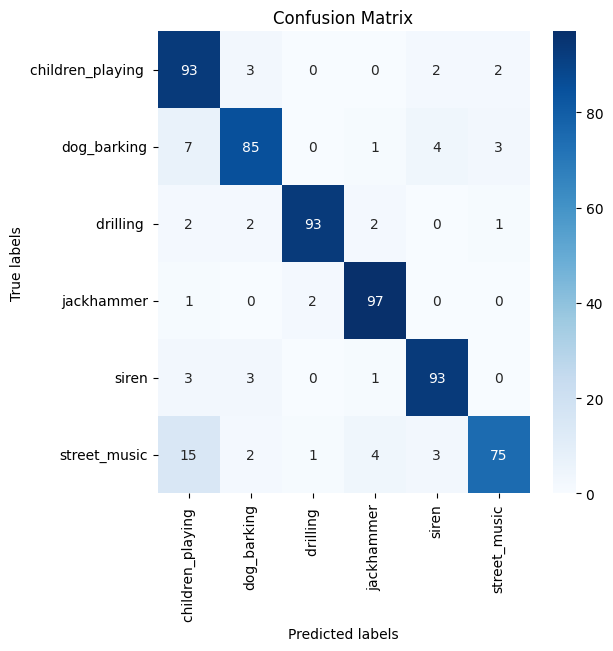

In [ ]:
conf_matrix = confusion_matrix(y_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['children_playing ', 'dog_barking', 'drilling ', 'jackhammer', 'siren', 'street_music'], yticklabels=['children_playing ', 'dog_barking', 'drilling ', 'jackhammer', 'siren', 'street_music'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()